## Model Selection - Instagram Top Post

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report, f1_score,\
                            accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

SEED = 0

In [2]:
# Load required data
df = pd.read_csv("db.csv")

# View the data
df

,height,width,has_audio,video_view_count,is_video,is_verified,followers_count,comments_count,hashtag_count,like_count,tag_name,caption_length,is_top
0,1349,1080,False,0,False,False,774304,626,0,50311,2021,49,1
1,1332,1080,False,0,False,False,68438,7,11,1957,2021,382,1
2,1350,1080,False,0,False,False,3122,102,23,595,2021,377,1
3,1080,1080,False,0,False,False,250500,123573,5,8290,2021,512,1
4,1349,1080,False,0,False,False,3578,26,4,365,2021,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,1085,1080,False,0,False,False,2002,28,15,74,world,671,0
2166,750,750,True,48,True,False,72,0,8,7,world,51,0
2167,1080,1080,False,0,False,False,1386,0,19,4,world,200,0
2168,1110,1080,False,0,False,False,450271,260,19,8371,world,463,0


In [3]:
for i in df:
    print(i)

height
width
has_audio
video_view_count
is_video
is_verified
followers_count
comments_count
hashtag_count
like_count
tag_name
caption_length
is_top


In [4]:
# Is the data balanced?
df['is_top'].value_counts()

1    1099
0    1071
Name: is_top, dtype: int64

### Step 2: Data Pre-processing & Exploratory Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   height            2170 non-null   int64 
 1   width             2170 non-null   int64 
 2   has_audio         2170 non-null   bool  
 3   video_view_count  2170 non-null   int64 
 4   is_video          2170 non-null   bool  
 5   is_verified       2170 non-null   bool  
 6   followers_count   2170 non-null   int64 
 7   comments_count    2170 non-null   int64 
 8   hashtag_count     2170 non-null   int64 
 9   like_count        2170 non-null   int64 
 10  tag_name          2170 non-null   object
 11  caption_length    2170 non-null   int64 
 12  is_top            2170 non-null   int64 
dtypes: bool(3), int64(9), object(1)
memory usage: 176.0+ KB


In [6]:
# Convert the 'has_audio' column from bool to object
df.has_audio= df['has_audio'].apply(lambda x : 'No' if x == 0 else 'Yes')

In [7]:
# Convert the 'is_video' from bool to object
df.is_video= df['is_video'].apply(lambda x : 'No' if x == 0 else 'Yes')

In [8]:
# Convert the 'is_verified' column from bool to object
df.is_verified= df['is_verified'].apply(lambda x : 'No' if x == 0 else 'Yes')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   height            2170 non-null   int64 
 1   width             2170 non-null   int64 
 2   has_audio         2170 non-null   object
 3   video_view_count  2170 non-null   int64 
 4   is_video          2170 non-null   object
 5   is_verified       2170 non-null   object
 6   followers_count   2170 non-null   int64 
 7   comments_count    2170 non-null   int64 
 8   hashtag_count     2170 non-null   int64 
 9   like_count        2170 non-null   int64 
 10  tag_name          2170 non-null   object
 11  caption_length    2170 non-null   int64 
 12  is_top            2170 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 220.5+ KB


In [10]:
# Any missing values to clean?
df.isna().any()

height              False
width               False
has_audio           False
video_view_count    False
is_video            False
is_verified         False
followers_count     False
comments_count      False
hashtag_count       False
like_count          False
tag_name            False
caption_length      False
is_top              False
dtype: bool

### Visualizations to see how independent variables contribute to a top post

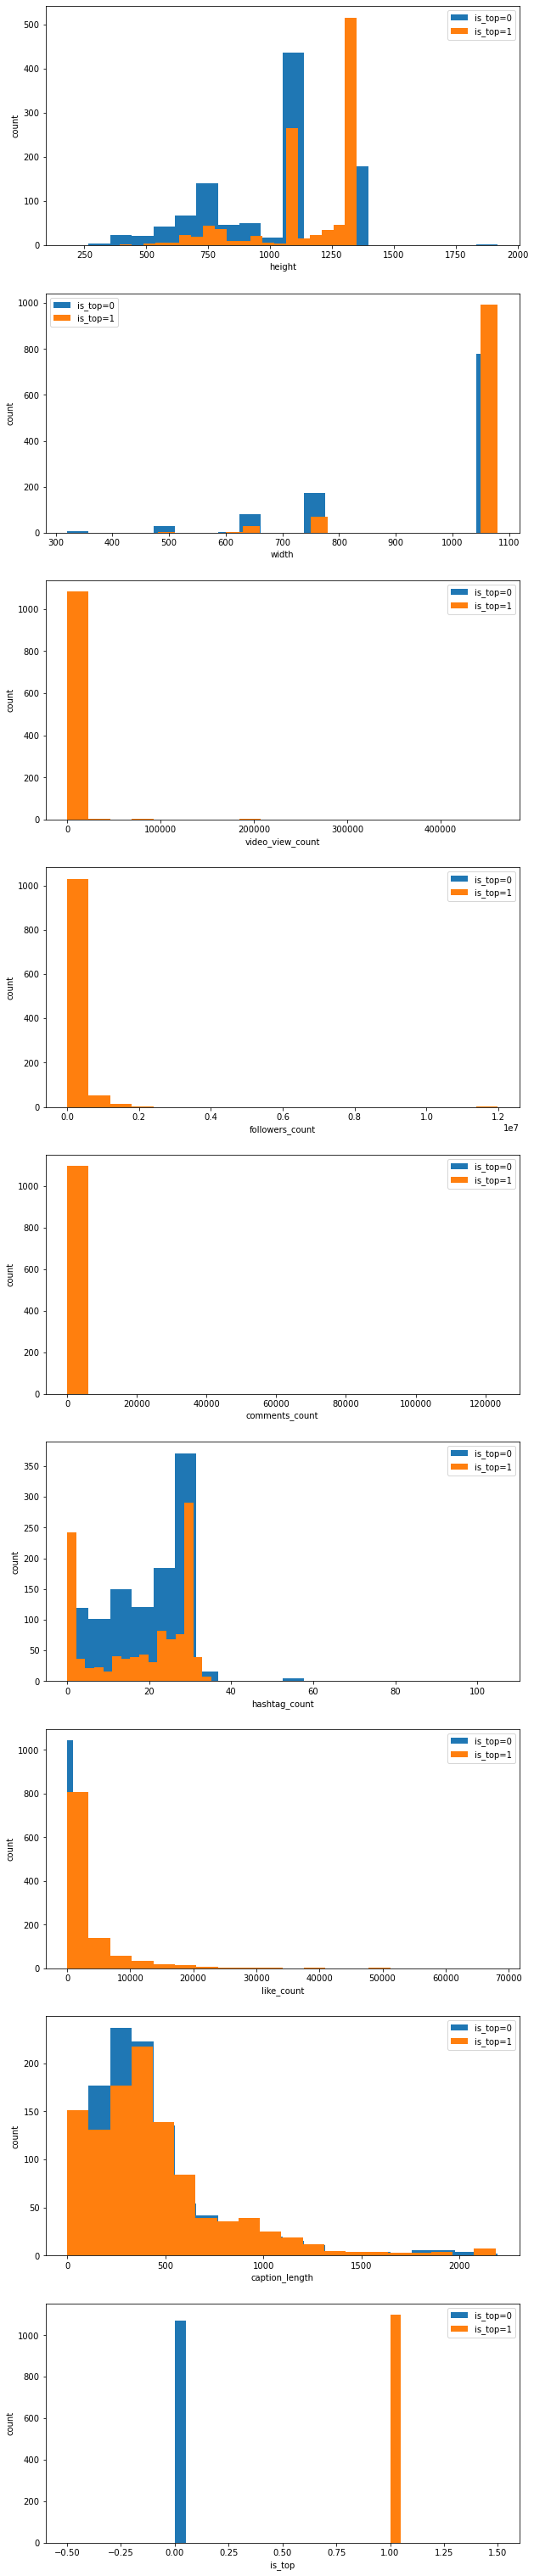

In [11]:
# # Visualizations of the non-object (int64) variables
continuous_vars = [i for i in df.columns if df[i].dtypes !='object']
fig,ax = plt.subplots(9,1,figsize=(10,55))

for i,x in enumerate(continuous_vars):
    ax[i].hist(df[x][df.is_top==0],label='is_top=0',bins=20)
    ax[i].hist(df[x][df.is_top==1],label='is_top=1',bins=20)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

In [12]:
continuous_vars

['height',
 'width',
 'video_view_count',
 'followers_count',
 'comments_count',
 'hashtag_count',
 'like_count',
 'caption_length',
 'is_top']

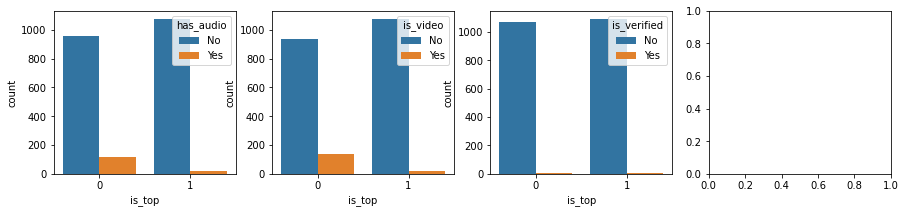

In [13]:
# Visualizations of the object variables
categorical_var = [i for i in df.columns if df[i].dtypes =='object']
catVars_isTop = categorical_var[:-1]

fig ,ax = plt.subplots(1,4,figsize=(15,3))
for axi ,var in zip(ax.flat,catVars_isTop):
    sns.countplot(x=df.is_top,hue=df[var],ax=axi)

In [14]:
categorical_var

['has_audio', 'is_video', 'is_verified', 'tag_name']

In [15]:
# Label Encoding for features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= le.fit_transform(df[x])

has_audio ['No' 'Yes']
is_video ['No' 'Yes']
is_verified ['No' 'Yes']
is_top [1 0]


In [16]:
# One Hot Encoding for features with more than 2 classes
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [17]:
df.sample(20)

,height,width,has_audio,video_view_count,is_video,is_verified,followers_count,comments_count,hashtag_count,like_count,...,tag_name_travel,tag_name_trump,tag_name_university,tag_name_water,tag_name_wolf,tag_name_women,tag_name_word,tag_name_workathome,tag_name_workonline,tag_name_world
1674,750,750,1,50,1,0,30,0,6,4,...,0,0,0,0,0,0,0,0,0,0
1978,1080,1080,0,0,0,0,5563,11,0,153,...,0,0,0,0,0,0,0,0,0,0
1746,645,1080,0,0,0,0,188,0,19,1,...,0,0,0,0,0,0,0,0,0,0
1191,658,750,0,0,0,0,483,15,14,62,...,0,0,0,0,0,0,0,0,0,0
990,1080,1080,0,0,0,0,1950,126,19,759,...,0,0,0,0,0,0,0,0,0,0
1013,600,480,0,0,0,0,124858,9,29,819,...,0,0,0,0,0,0,0,0,0,0
462,1350,1080,0,0,0,0,15899,65,22,528,...,0,0,0,0,0,0,0,0,0,0
495,640,640,0,0,0,0,699,12,0,187,...,0,0,0,0,0,0,0,0,0,0
2013,750,750,0,37,1,0,578,0,17,9,...,0,0,1,0,0,0,0,0,0,0
608,1348,1080,0,0,0,0,626462,45,22,10428,...,0,0,0,0,0,0,0,0,0,0


In [18]:
for i in df.columns:
    print(i)

height
width
has_audio
video_view_count
is_video
is_verified
followers_count
comments_count
hashtag_count
like_count
caption_length
is_top
tag_name_Afghanistan
tag_name_Albania
tag_name_Algeria
tag_name_Angola
tag_name_Argentina
tag_name_Australia
tag_name_Austria
tag_name_Belgium
tag_name_Brazil
tag_name_Cameroon
tag_name_Chile
tag_name_Computer
tag_name_Ecuador
tag_name_Egypt
tag_name_Greece
tag_name_Iraq
tag_name_Israel
tag_name_Mexico
tag_name_Morocco
tag_name_NBA
tag_name_Netherlands
tag_name_New_Zealand
tag_name_Oman
tag_name_Pakistan
tag_name_Philippines
tag_name_Poland
tag_name_Portugal
tag_name_Qatar
tag_name_Romania
tag_name_Senegal
tag_name_Serbia
tag_name_Spain
tag_name_Thailand
tag_name_Turkey
tag_name_USA
tag_name_Ukraine
tag_name_Uzbekistan
tag_name_amazon
tag_name_animal
tag_name_arab
tag_name_artwork
tag_name_asia
tag_name_bitcoin
tag_name_blockchain
tag_name_buy
tag_name_canada
tag_name_cat
tag_name_ceo
tag_name_chef
tag_name_chigago
tag_name_china
tag_name_club
tag_n

### Split data and train model

In [19]:
# Split & train the model
X=df.drop('is_top',axis=1)
y=df['is_top']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

#### Scale the Features

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Baseline model using Logistic Regression

In [21]:
logreg = LogisticRegression()

In [22]:
# K-fold cross validation using F1-score as scorer
scores = cross_val_score(logreg, 
                         X_train_scaled, 
                         y_train, 
                         cv=5, 
                         scoring='f1_macro')
print('F1 scores:', scores)
print('Mean & standard deviation: {:.2} {:.2f}'.format(scores.mean(), np.std(scores)))

F1 scores: [0.80177099 0.82455743 0.82104883 0.8336556  0.84865764]
Mean & standard deviation: 0.83 0.02


#### Model Selection - Train and evaluate multiple models

In [23]:
# Lists to keep track of model metrics
models = []
precision_list = []
recall_list = []
f1_score_list = []
training_acc_list = []
testing_acc_list = []

### Using ML Model: Logistic Regression

In [24]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)

In [25]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': np.logspace(-4.5, 10, 15)}

gs_logreg = GridSearchCV(logreg,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_logreg.fit(X_train_scaled, y_train)

Wall time: 5.22 s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': array([3.16227766e-05, 3.43332002e-04, 3.72759372e-03, 4.04708995e-02,
       4.39397056e-01, 4.77058270e+00, 5.17947468e+01, 5.62341325e+02,
       6.10540230e+03, 6.62870316e+04, 7.19685673e+05, 7.81370738e+06,
       8.48342898e+07, 9.21055318e+08, 1.00000000e+10]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_macro')

In [26]:
# Best model hyperparameters and score
print('LOGISTIC REGRESSION - FINE TUNED HYPERPARAMETERS')
print()
print('Best Estimator:', gs_logreg.best_estimator_)
print('Best Parameters:', gs_logreg.best_params_)
print('Best Score:', gs_logreg.best_score_)

LOGISTIC REGRESSION - FINE TUNED HYPERPARAMETERS

Best Estimator: LogisticRegression(C=84834289.8244076, n_jobs=-1)
Best Parameters: {'C': 84834289.8244076, 'penalty': 'l2'}
Best Score: 0.8630919622213158


In [27]:
# Using best estimator found by GridSearchCV
logreg = gs_logreg.best_estimator_
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=84834289.8244076, n_jobs=-1)

In [28]:
y_pred = logreg.predict(X_test_scaled)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       263
           1       0.92      0.81      0.87       280

    accuracy                           0.87       543
   macro avg       0.87      0.87      0.87       543
weighted avg       0.88      0.87      0.87       543



In [30]:
models.append('Logistic Regression')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, logreg.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

### Using ML Model: Random Forest

In [31]:
rf = RandomForestClassifier(n_jobs=-1)

In [32]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 25],
              'min_samples_split': [5, 10, 15]}

gs_rf = GridSearchCV(rf,
                    param_grid, 
                    cv=5,
                    scoring='f1_macro',
                    n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)

Wall time: 50.8 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 25],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [33]:
# Best model hyperparameters and score
print('RANDOM FOREST - FINE TUNED HYPERPARAMETERS')
print()
print('Best Estimator:', gs_rf.best_estimator_)
print('Best Parameters:', gs_rf.best_params_)
print('Best Score:', gs_rf.best_score_)

RANDOM FOREST - FINE TUNED HYPERPARAMETERS

Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=15,
                       n_jobs=-1)
Best Parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 15, 'n_estimators': 100}
Best Score: 0.9507664705688077


In [34]:
# Using best estimator found by GridSearchCV
rf = gs_rf.best_estimator_
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=15,
                       n_jobs=-1)

In [35]:
y_pred = rf.predict(X_test_scaled)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       263
           1       0.92      0.97      0.94       280

    accuracy                           0.94       543
   macro avg       0.94      0.94      0.94       543
weighted avg       0.94      0.94      0.94       543



In [37]:
models.append('Random Forest')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

### Summary

In [38]:
model_metrics = pd.DataFrame(zip(models, training_acc_list, testing_acc_list,
                                 precision_list, recall_list, f1_score_list), 
                             columns=['Model', 'Training Acc', 'Testing Acc', 'Precision', 'Recall', 'F1 Score'])

In [39]:
model_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Training Acc,Testing Acc,Precision,Recall,F1 Score
1,Random Forest,0.966195,0.939227,0.941652,0.938186,0.938987
0,Logistic Regression,0.900430,0.869245,0.873701,0.871021,0.869131


### Predict & Evaluate the Best Model

In [40]:
# Prediction by selected model
y_pred = rf.predict(X_test_scaled)

In [41]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       263
           1       0.92      0.97      0.94       280

    accuracy                           0.94       543
   macro avg       0.94      0.94      0.94       543
weighted avg       0.94      0.94      0.94       543



Text(33.0, 0.5, 'Predicted')

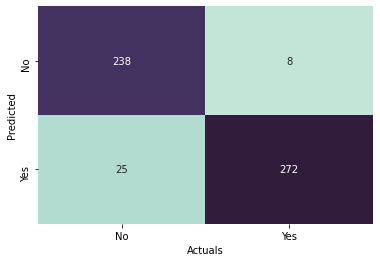

In [42]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Get and plot features importance

In [43]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

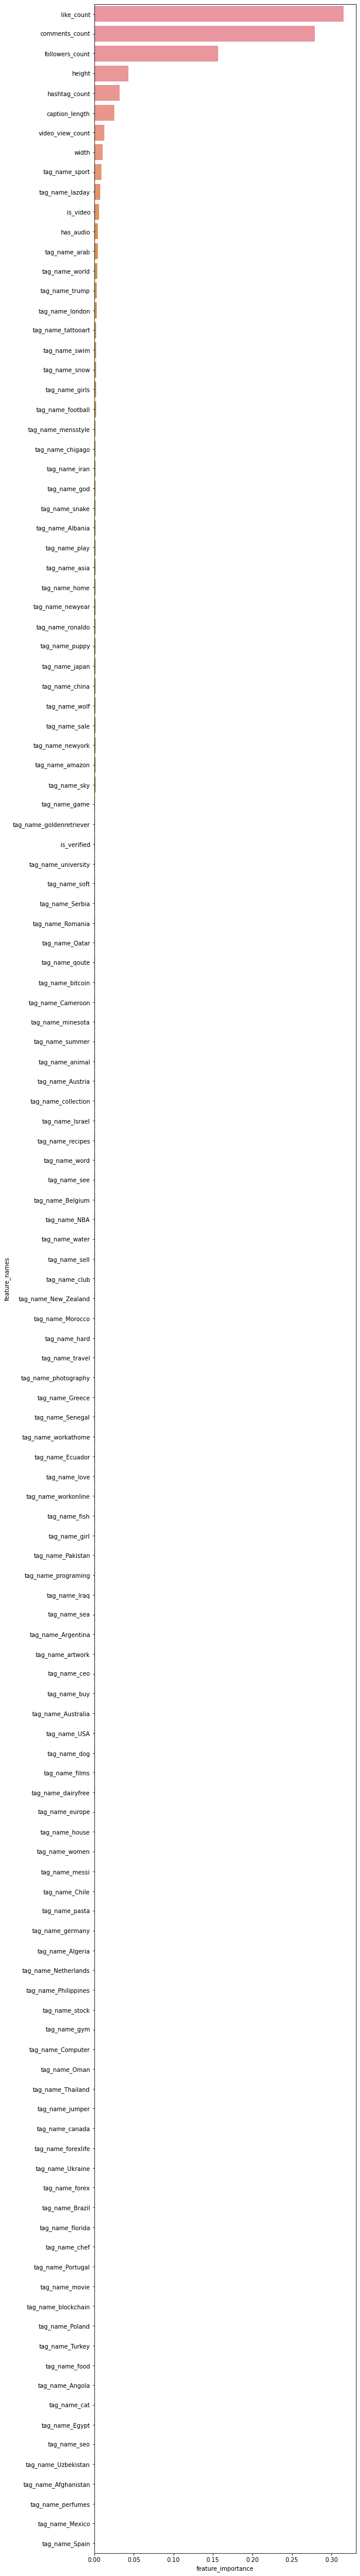

In [47]:
plt.figure(figsize=(8,80))
sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])

### Mission Completed!